# Plot Time
This function will plot the n_count of a population vs. the time it was recorded.
Load the popcycle package first. Then using the "Scope 1" example data included in the github package, assign paths to `db`, `opp.dir`, and `vct.dir`.

In [1]:
library(popcycle)

Loading required package: RSQLite
Loading required package: DBI
Loading required package: splancs
Loading required package: sp

Spatial Point Pattern Analysis Code in S-Plus
 
 Version 2 - Spatial and Space-Time analysis

Loading required package: plyr
Loading required package: uuid
Loading required package: tools


In [10]:
path <- "/Volumes/data/data/seaflow/refilter/"
cruise <- "SCOPE_2"
db <- paste0(path,cruise,"/",cruise,".db")
opp.dir <- paste0(path,cruise,"/",cruise,"_opp")
vct.dir <- paste0(path,cruise,"/",cruise,"_vct")

### LOAD THIS FUNCTION

In [8]:
plot.time = function(db) {
    table <- get.stat.table(db)
    population.list <- subset(table, pop == "synecho")
    population.list.filtered <- population.list[(population.list$n_count < 80000),]
    #population.list.filtered <- population.list.filtered[(population.list.filtered$n_count > 0),]
    time.stat <- as.POSIXct(population.list.filtered$time, format = "%FT%T", tz = "GMT")
    pop.count <- population.list.filtered$n_count 
    plot(time.stat, pop.count)
} 

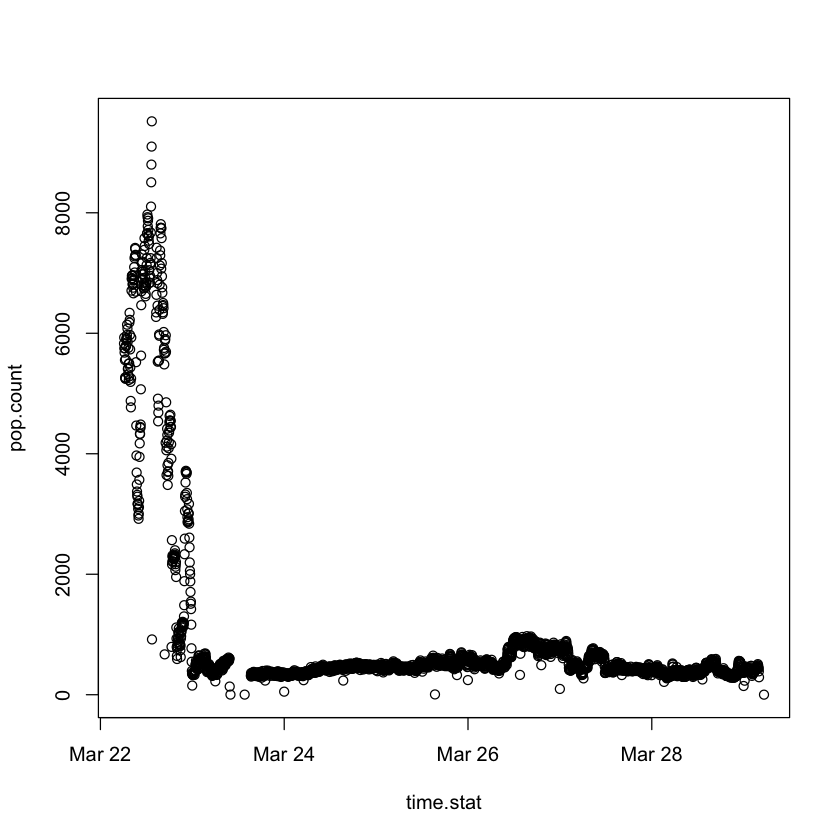

In [9]:
plot.time(db)